In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv(r"../data/prices.csv")

columns = [data.iloc[:, i].to_numpy() for i in range(1,len(data.columns))]
series = list(map(list, zip(*columns)))

# Normalization of the data
scaler = StandardScaler()
series = scaler.fit_transform(series)

len(series)

8030

In [5]:
mu = scaler.mean_
sigma = scaler.scale_
sigma

array([ 33.81230562,  29.92566225,  23.95642845,  23.08344885,
        24.99149734,  30.37790109,  64.62803107,  75.02307404,
        86.47102203,  99.48511891, 119.52592161, 135.64488764,
       134.60637697, 142.45167965, 145.43296655, 147.49190841,
       161.93358766, 181.04869188, 142.53849513, 122.44785276,
       105.25500325,  93.67965756,  52.06614424,  47.67590622])

In [6]:
import numpy as np

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

lags = 3
X, y = create_sequences(series, lags)

In [7]:
lag_gnn = 90
train_size = int(0.8 * (len(X)-lag_gnn+1))
train_size

6350

In [8]:
train_stop = train_size+lag_gnn-1
train_stop

6439

In [9]:
test_size = len(X)-train_size-lag_gnn+1
test_size

1588

In [10]:
X_train = X[lag_gnn-1:train_stop]
X_test = X[train_stop:]

In [11]:
y_train = y[lag_gnn-1:train_stop]
y_test = y[train_stop:]
len(y_test)

1588

In [59]:
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 24)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 24)
# X_train

In [13]:
import torch
import torch.nn.functional as F
import time

class CNN(torch.nn.Module):
    def __init__(self, in_channels, num_classes=1):
        super(CNN, self).__init__()

        self.conv = torch.nn.Conv1d(in_channels=in_channels, out_channels=8, kernel_size=2)
        self.pool = torch.nn.MaxPool1d(kernel_size=2, stride=1)
        self.fc = torch.nn.Linear(8*22, num_classes)

    def forward(self, x):
        x = F.relu(self.conv(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc(x)
        return x

In [14]:
model = CNN(3)

  Epoch 1/400
Training loss:  1.3528961
  Epoch 2/400
Training loss:  0.86036664
  Epoch 3/400
Training loss:  1.0013227
  Epoch 4/400
Training loss:  0.9710914
  Epoch 5/400
Training loss:  0.8521362
  Epoch 6/400
Training loss:  0.7956363
  Epoch 7/400
Training loss:  0.8000541
  Epoch 8/400
Training loss:  0.82094646
  Epoch 9/400
Training loss:  0.83257425
  Epoch 10/400
Training loss:  0.8303642
  Epoch 11/400
Training loss:  0.8184262
  Epoch 12/400
Training loss:  0.80212504
  Epoch 13/400
Training loss:  0.78569543
  Epoch 14/400
Training loss:  0.7724096
  Epoch 15/400
Training loss:  0.7649614
  Epoch 16/400
Training loss:  0.7648036
  Epoch 17/400
Training loss:  0.7699683
  Epoch 18/400
Training loss:  0.7749825
  Epoch 19/400
Training loss:  0.7747449
  Epoch 20/400
Training loss:  0.7685998
  Epoch 21/400
Training loss:  0.76016563
  Epoch 22/400
Training loss:  0.75380033
  Epoch 23/400
Training loss:  0.7516456
  Epoch 24/400
Training loss:  0.75307256
  Epoch 25/400
Tr

/opt/tljh/user/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([6350, 24])) that is different to the input size (torch.Size([6350, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/tljh/user/lib/python3.10/site-packages/torch/autograd/__init__.py:266: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Training loss:  0.7183227
  Epoch 91/400
Training loss:  0.71821404
  Epoch 92/400
Training loss:  0.71811116
  Epoch 93/400
Training loss:  0.7180149
  Epoch 94/400
Training loss:  0.7179153
  Epoch 95/400
Training loss:  0.717811
  Epoch 96/400
Training loss:  0.7177093
  Epoch 97/400
Training loss:  0.7176131
  Epoch 98/400
Training loss:  0.7175211
  Epoch 99/400
Training loss:  0.71743035
  Epoch 100/400
Training loss:  0.71733737
  Epoch 101/400
Training loss:  0.71724755
  Epoch 102/400
Training loss:  0.7171623
  Epoch 103/400
Training loss:  0.717074
  Epoch 104/400
Training loss:  0.71698266
  Epoch 105/400
Training loss:  0.7168921
  Epoch 106/400
Training loss:  0.71680605
  Epoch 107/400
Training loss:  0.7167189
  Epoch 108/400
Training loss:  0.7166279
  Epoch 109/400
Training loss:  0.71653545
  Epoch 110/400
Training loss:  0.7164438
  Epoch 111/400
Training loss:  0.71635467
  Epoch 112/400
Training loss:  0.71626633
  Epoch 113/400
Training loss:  0.7161769
  Epoch 1

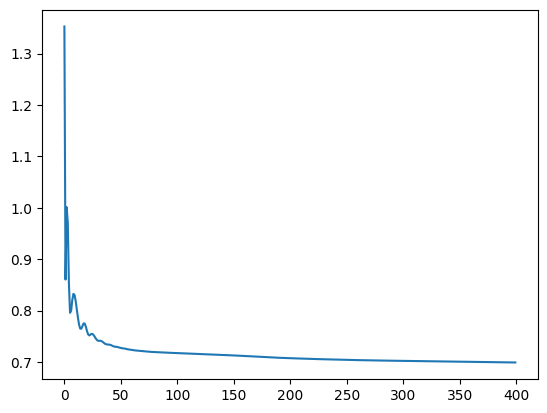

In [15]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.015)
loss_fn = torch.nn.MSELoss()

start_time = time.perf_counter() # Start timer
num_epochs = 400
losses = []
for epoch in range(num_epochs):
    model.train()
    print("  Epoch %d/%d" % (epoch+1,num_epochs))
    output = model(torch.tensor(X_train, dtype=torch.float32))
    y_label = torch.tensor(y_train, dtype=torch.float32)
    loss = loss_fn(output, y_label)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.cpu().detach().numpy())
    
    print('Training loss: ', losses[-1])

print(output.shape)
end_time = time.perf_counter() # End timer
print("Elapsed time: ", end_time - start_time) # Calculate elapsed time
output = output.cpu().detach().numpy()*sigma+mu

plt.plot(losses)

In [16]:
model.eval()

output_test = model(torch.tensor(X_test, dtype=torch.float32))
y_label = torch.tensor(y_test, dtype=torch.float32)
loss = loss_fn(output_test, y_label)
outputs_test = output_test.cpu().detach().numpy()*sigma+mu
loss.item()

/opt/tljh/user/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1588, 24])) that is different to the input size (torch.Size([1588, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0.7550288438796997

In [17]:
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)
y_train

array([[24.  , 24.  , 24.01, ..., 44.4 , 44.12, 39.42],
       [24.  , 24.  , 24.  , ..., 48.07, 42.76, 30.09],
       [23.99, 24.  ,  6.44, ..., 44.63, 41.23, 35.7 ],
       ...,
       [18.4 , 18.39, 18.35, ..., 18.45, 17.42, 15.37],
       [14.05, 14.18, 14.89, ..., 17.37, 15.39, 15.31],
       [15.38, 15.4 , 16.14, ..., 22.98, 20.91, 18.87]])

In [20]:
outputs_hourly = []
targets_hourly = []
outputs_test_hourly = []
targets_test_hourly = []
for j in range(24):
    outputs_h = [output[i][j] for i in range(len(output))]
    outputs_hourly.append(outputs_h)
    targets_h = [y_train[i][j] for i in range(len(output))]
    targets_hourly.append(targets_h)
    outputs_test_h = [outputs_test[i][j] for i in range(len(outputs_test))]
    outputs_test_hourly.append(outputs_test_h)
    targets_test_h = [y_test[i][j] for i in range(len(outputs_test))]
    targets_test_hourly.append(targets_test_h)

In [21]:
mse_train = []
residuals_train = []
mse_test = []
mae_test = []
residuals_test = []
for j in range(24):
    diff = [a - b for a,b in zip(targets_hourly[j],outputs_hourly[j])]
    squared_diff = [(a - b)**2 for a,b in zip(targets_hourly[j],outputs_hourly[j])]
    mse_train.append(np.mean(squared_diff))
    residuals_train.append(diff)
    diffabs = [abs(a - b) for a,b in zip(targets_test_hourly[j],outputs_test_hourly[j])]
    diff = [a - b for a,b in zip(targets_test_hourly[j],outputs_test_hourly[j])]
    squared_diff = [(a - b)**2 for a,b in zip(targets_test_hourly[j],outputs_test_hourly[j])]
    mae_test.append(np.mean(diffabs))
    mse_test.append(np.mean(squared_diff))
    residuals_test.append(diff)

mse_train

[740.0195113570637,
 625.9781666086906,
 366.80024300140246,
 303.65696366577134,
 361.28032577637526,
 498.4920569238679,
 3024.9386124009047,
 3561.581958248996,
 4684.935038397678,
 6356.0702868129165,
 9607.138993303752,
 13218.949778349051,
 13958.778393331022,
 15970.57896846511,
 16890.585547168434,
 17101.703394079086,
 19466.50442715335,
 24663.480791503323,
 14635.692637757578,
 10765.660655222517,
 8084.813401110405,
 6767.615403049217,
 1863.0918821177356,
 1869.7450104671975]

In [76]:
mse_test

[756.3421776482678,
 413.0354614105916,
 251.89741055639698,
 406.0024831946904,
 522.3588993059421,
 1135.008704507708,
 3583.868627972316,
 5290.677439825803,
 6483.425491329008,
 8341.094832266299,
 10946.977486467847,
 12067.82061181836,
 10804.461591455705,
 14479.235733524887,
 14864.602259677898,
 16581.609384852356,
 21663.617784405218,
 23870.40553331553,
 16400.140166218738,
 12197.127692856,
 8141.46338470469,
 4565.774676285375,
 2050.2060914407034,
 1706.879315232452]

In [22]:
np.mean(mse_test)

8243.409885369232

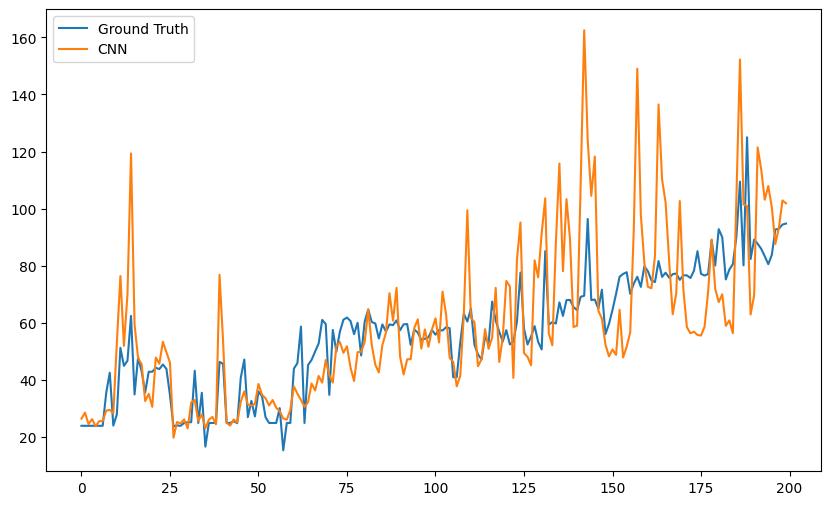

In [23]:
fig = plt.figure(figsize=(10,6))
plt.plot(targets_hourly[0][:200],label='Ground Truth')
plt.plot(outputs_hourly[0][:200],label='CNN')
#plt.plot(outputs_test)
plt.legend()
plt.show()

In [79]:
#unisco train e test
outputs_merged = [l1 + l2 for l1, l2 in zip(outputs_hourly, outputs_test_hourly)]
targets_merged = [l1 + l2 for l1, l2 in zip(targets_hourly, targets_test_hourly)]

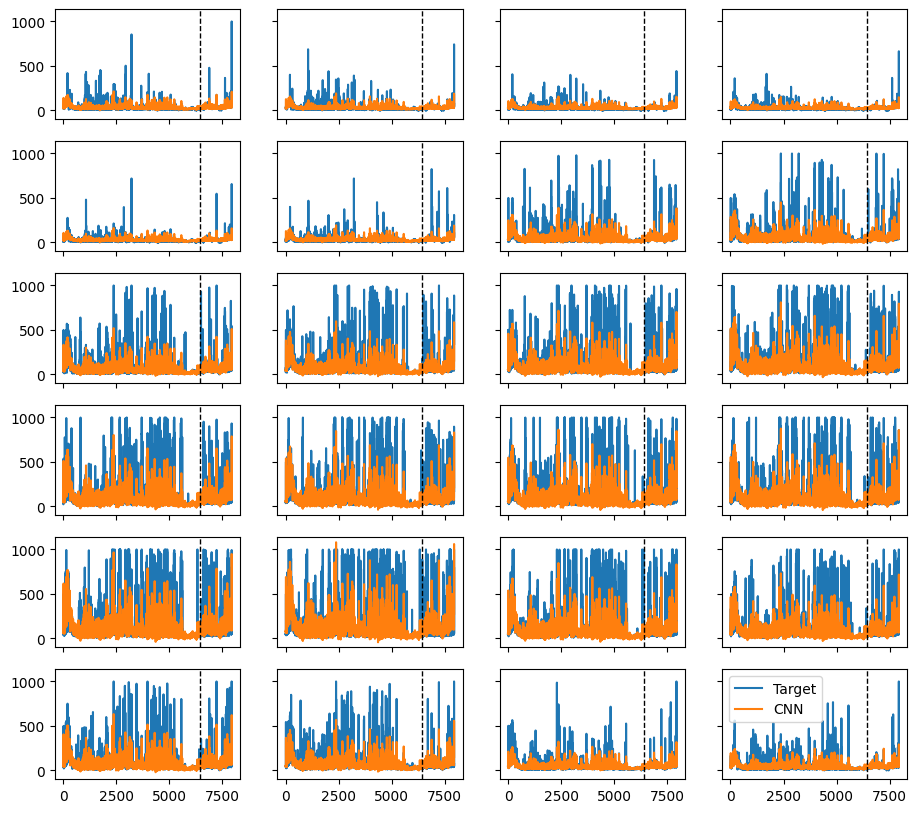

In [80]:
fig, axs = plt.subplots(6, 4, figsize=(11, 10), sharey=True, sharex=True)
name_model = 'CNN'

# Iteriamo sulla lista delle matrici e le visualizziamo in subplots
for i in range(6):
    axs[i,0].plot(targets_merged[i*4], label="Target")
    axs[i,0].plot(outputs_merged[i*4], label=name_model)
    axs[i,0].axvline(x=6420, color='black', linestyle='--', linewidth=1)
    axs[i,1].plot(targets_merged[i*4+1], label="Target")
    axs[i,1].plot(outputs_merged[i*4+1], label=name_model)
    axs[i,1].axvline(x=6420, color='black', linestyle='--', linewidth=1)
    axs[i,2].plot(targets_merged[i*4+2], label="Target")
    axs[i,2].plot(outputs_merged[i*4+2], label=name_model)
    axs[i,2].axvline(x=6420, color='black', linestyle='--', linewidth=1)
    axs[i,3].plot(targets_merged[i*4+3], label="Target")
    axs[i,3].plot(outputs_merged[i*4+3], label=name_model)
    axs[i,3].axvline(x=6420, color='black', linestyle='--', linewidth=1)

plt.legend()
#plt.savefig('plot/dyn'+name_model.lower()+'.jpg', format='jpg')
# Mostriamo la figura con tutti i subplot
plt.show()